The Challenge
The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
titanic=pd.read_csv("/content/sample_data/titanic_train.csv") #Reading the DataSet
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
titanic.shape

(891, 12)

survival-	Survival	0 = No, 1 = Yes
pclass-	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
sex-	Sex
Age-	Age in years
sibsp# of siblings / spouses aboard the Titanic
parch# of parents / children aboard the Titanic
ticket-	Ticket number
fare-	Passenger fare
cabin-	Cabin number
embarked-	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

In [ ]:
titanic.size

10692

In [ ]:
titanic.ndim

2

In [ ]:
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Pulling Unique Values

In [ ]:
titanic.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [ ]:
titanic["Pclass"].unique()

array([3, 1, 2])

In [ ]:
titanic["Embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [ ]:
titanic["SibSp"].unique()

array([1, 0, 3, 4, 2, 5, 8])

In [ ]:
titanic["Survived"].unique()

array([0, 1])

In [ ]:
titanic["Sex"].unique()

array(['male', 'female'], dtype=object)

Check Duplicates

In [ ]:
titanic.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Length: 891, dtype: bool

In [ ]:
titanic.duplicated().sum() #because we don't have any duplicate values within the dataset

0

#check Missing Values/ Missing Value handling

In [ ]:
titanic.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
titanic.isnull().sum() #total Null values or Missing Values.

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
titanic=titanic.drop(['Cabin'],axis=1)

In [ ]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [ ]:
age_avg=titanic.Age.mean()
print(age_avg)

29.69911764705882


In [ ]:
titanic["Age"].replace(np.nan,age_avg,inplace=True)

In [ ]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [ ]:
#for categorical Column(String Data)-> mode/frequency

In [ ]:
fiq=titanic.Embarked.dropna().mode()[0]

In [ ]:
print(fiq)

S


In [ ]:
titanic.Embarked.replace(np.nan,fiq,inplace=True)

In [ ]:
titanic.isnull().sum() #missing data handlings

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [ ]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


Checking Dead and survived

<Axes: xlabel='Survived', ylabel='count'>

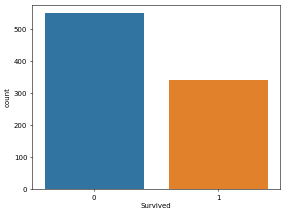

In [ ]:
plt.figure(dpi=50)
sns.countplot(x="Survived",data=titanic)

In [ ]:
titanic["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

<Axes: xlabel='Sex', ylabel='count'>

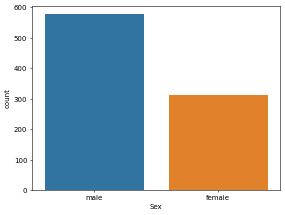

In [ ]:
plt.figure(dpi=50)
sns.countplot(x="Sex",data=titanic) #according to Male and Female

<Axes: xlabel='Survived', ylabel='count'>

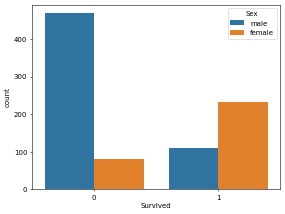

In [ ]:
plt.figure(dpi=50) #according to the male female and total survival Totled graph.
sns.countplot(x="Survived",hue="Sex",data=titanic)

In [ ]:
#plt.figure(dpi=50) #flitering the data
men_survival=titanic[titanic.Sex=="male"]["Survived"].count() #how many male under survival
print(men_survival)

577


In [ ]:
#filetering

In [ ]:
#survial rate for male.

In [ ]:
men_survival=titanic[titanic.Sex=="male"]["Survived"] #females are excluded
men_survival_rate=sum(men_survival)/len(men_survival)*100
print(sum(men_survival))
print(men_survival)
print(men_survival_rate)

109
0      0
4      0
5      0
6      0
7      0
      ..
883    0
884    0
886    0
889    1
890    0
Name: Survived, Length: 577, dtype: int64
18.890814558058924


In [ ]:
titanic[(titanic.Sex=="male")&(titanic.Survived==1)].count() #total number of male survived #method 1

PassengerId    109
Survived       109
Pclass         109
Name           109
Sex            109
Age            109
SibSp          109
Parch          109
Ticket         109
Fare           109
Embarked       109
dtype: int64

In [ ]:
len(titanic[(titanic.Sex=="male")&(titanic.Survived==1)]) #find total survival rate of male method 2

109

In [ ]:
female_survival=titanic[titanic.Sex=="female"]["Survived"] #males are excluded
female_survival_rate=sum(female_survival)/len(female_survival)*100
print(female_survival)
print(sum(female_survival))
print(female_survival_rate)

1      1
2      1
3      1
8      1
9      1
      ..
880    1
882    0
885    0
887    1
888    0
Name: Survived, Length: 314, dtype: int64
233
74.20382165605095


GroupBy

In [ ]:
res=titanic.groupby("Sex")["Survived"].value_counts() #use of groupby to get an undersatnding how many people survived according to male and female
print(res)

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64


In [ ]:
res=titanic.groupby("Sex")["Survived"].value_counts(normalize=True) # give the percentage of survival
print(res)

Sex     Survived
female  1           0.742038
        0           0.257962
male    0           0.811092
        1           0.188908
Name: Survived, dtype: float64


In [ ]:
print("percentage of Women survived",res[0]*100) #female survived

percentage of Women survived 74.20382165605095


In [ ]:
print("percentage of Women not survived",res[1]*100)# female Not Survived

percentage of Women not survived 25.796178343949045


In [ ]:
print("percentage of Men survived",res[2]*100) #Male Survived

percentage of Men survived 81.10918544194108


In [ ]:
print("percentage of Men notsurvived",res[3]*100) #male not survived

percentage of Men notsurvived 18.890814558058924


Survival Rate Based on Passanger class

Survived vs Pclass

<Axes: xlabel='Survived', ylabel='count'>

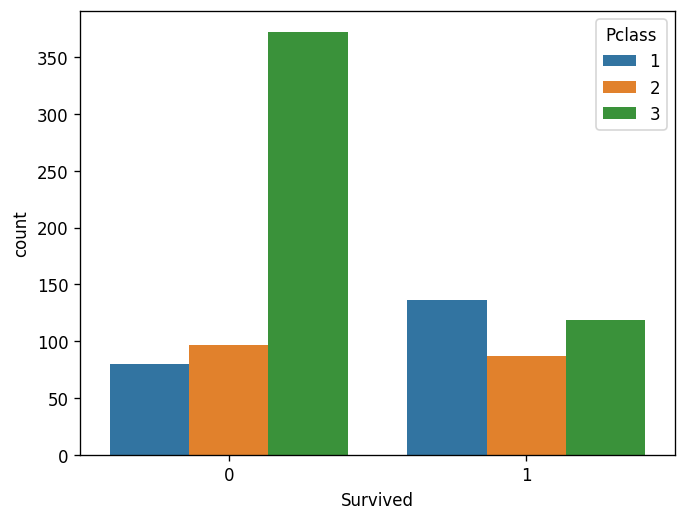

In [ ]:
plt.figure(dpi=120)
sns.countplot(x="Survived",hue="Pclass",data=titanic)

In [ ]:
res1=titanic.groupby("Pclass")["Survived"].value_counts(normalize=True)
print(res1)

Pclass  Survived
1       1           0.629630
        0           0.370370
2       0           0.527174
        1           0.472826
3       0           0.757637
        1           0.242363
Name: Survived, dtype: float64


In [ ]:
res1=titanic.groupby("Pclass")["Survived"].value_counts()
print(res1)

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64


In [ ]:
print("percentage Not survival of class1",res1[1][0]*100)
print("percentage survival of class1",res1[1][1]*100)

percentage Not survival of class1 37.03703703703704
percentage survival of class1 62.96296296296296


In [ ]:
print("percentage Not survival of class2",res1[2][0]*100)
print("percentage survival of class2",res1[2][1]*100)

percentage Not survival of class2 52.71739130434783
percentage survival of class2 47.28260869565217


In [ ]:
print("percentage Not survival of class3",res1[3][0]*100)
print("percentage survival of class3",res1[3][1]*100)

percentage Not survival of class3 75.76374745417516
percentage survival of class3 24.236252545824847


In [ ]:
total_survived=titanic[titanic.Pclass==1]["Survived"] #total people with Pclass 1 that are in survived cloumn
total_survival_rate=sum(total_survived)/len(total_survived)*100 #percentage of total survival rate, those who are survived from pclass 1
print(len(total_survived)) #len of Pclass 1
print(sum(total_survived)) #sum of total survival people
print(total_survival_rate) #percentage of all survived people from Pclass 1

216
136
62.96296296296296


In [ ]:
total_survived=titanic[titanic.Pclass==2]["Survived"]
total_survival_rate=sum(total_survived)/len(total_survived)*100
print(len(total_survived))
print(sum(total_survived))
print(total_survival_rate)

184
87
47.28260869565217


In [ ]:
total_survived=titanic[titanic.Pclass==3]["Survived"]
total_survival_rate=sum(total_survived)/len(total_survived)*100
print(len(total_survived))
print(sum(total_survived))
print(total_survival_rate)

491
119
24.236252545824847


Survival Based on Embarked

<Axes: xlabel='Survived', ylabel='count'>

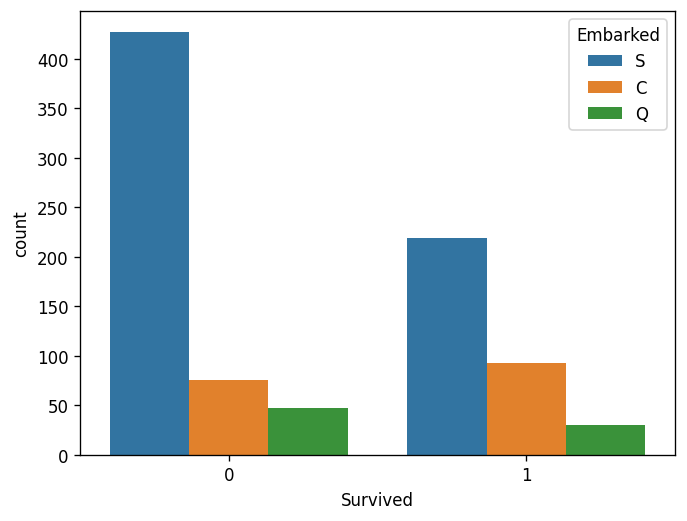

In [ ]:
plt.figure(dpi=120)
sns.countplot(x="Survived",hue="Embarked",data=titanic)

In [ ]:
titanic["Embarked"].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
total_survived=titanic[titanic.Embarked=="S"]["Survived"]
total_survival_rate=sum(total_survived)/len(total_survived)*100
print(len(total_survived))
print(sum(total_survived))
print(total_survival_rate)

646
219
33.90092879256966


In [ ]:
total_survived=titanic[titanic.Embarked=="C"]["Survived"]
total_survival_rate=sum(total_survived)/len(total_survived)*100
print(len(total_survived))
print(sum(total_survived))
print(total_survival_rate)

168
93
55.35714285714286


In [ ]:
total_survived=titanic[titanic.Embarked=="Q"]["Survived"]
total_survival_rate=sum(total_survived)/len(total_survived)*100
print(len(total_survived))
print(sum(total_survived))
print(total_survival_rate)

77
30
38.961038961038966


In [ ]:
res2=titanic.groupby("Embarked")["Survived"].value_counts()
print(res2)

Embarked  Survived
C         1            93
          0            75
Q         0            47
          1            30
S         0           427
          1           219
Name: Survived, dtype: int64


In [ ]:
res2=titanic.groupby("Embarked")["Survived"].count()
print(res2)

Embarked
C    168
Q     77
S    646
Name: Survived, dtype: int64


In [ ]:
res2=titanic.groupby("Embarked")["Survived"].value_counts(normalize=True)
print(res2)

Embarked  Survived
C         1           0.553571
          0           0.446429
Q         0           0.610390
          1           0.389610
S         0           0.660991
          1           0.339009
Name: Survived, dtype: float64


Survival Based SibSp

<Axes: xlabel='Survived', ylabel='count'>

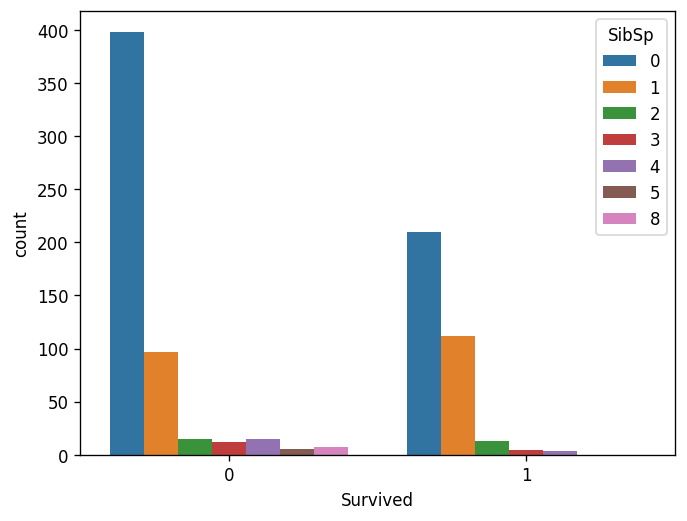

In [ ]:
plt.figure(dpi=120)
sns.countplot(x="Survived",hue="SibSp",data=titanic)

In [ ]:
res3=titanic.groupby("SibSp")["Survived"].value_counts()
print(res3)

SibSp  Survived
0      0           398
       1           210
1      1           112
       0            97
2      0            15
       1            13
3      0            12
       1             4
4      0            15
       1             3
5      0             5
8      0             7
Name: Survived, dtype: int64


In [ ]:
res3=titanic.groupby("SibSp")["Survived"].value_counts(normalize=True)
print(res3)

SibSp  Survived
0      0           0.654605
       1           0.345395
1      1           0.535885
       0           0.464115
2      0           0.535714
       1           0.464286
3      0           0.750000
       1           0.250000
4      0           0.833333
       1           0.166667
5      0           1.000000
8      0           1.000000
Name: Survived, dtype: float64


Survial based on Fare

<Axes: xlabel='Survived', ylabel='count'>

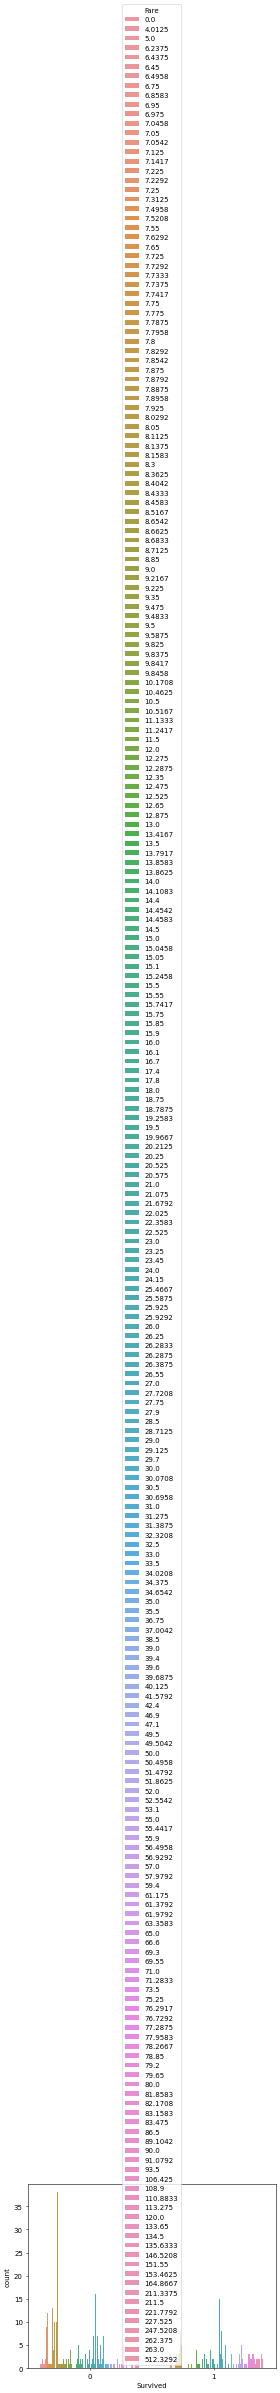

In [ ]:
plt.figure(dpi=50)
sns.countplot(x="Survived",hue="Fare",data=titanic) #count plot will not work as it dont

<Axes: xlabel='Survived', ylabel='Fare'>

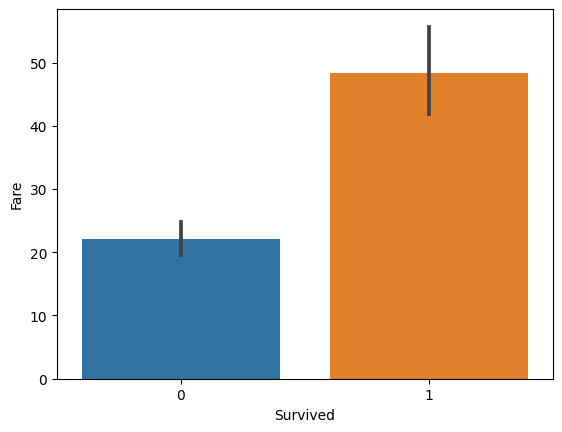

In [ ]:
plt.figure(dpi=100)
sns.barplot(x="Survived",y="Fare",data=titanic)

<Axes: xlabel='Survived', ylabel='Fare'>

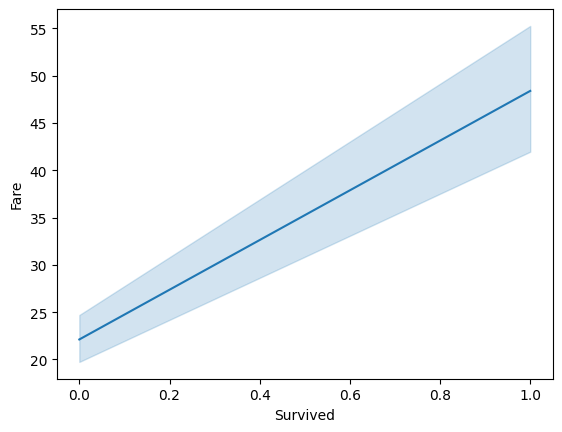

In [ ]:
plt.figure(dpi=100)
sns.lineplot(x="Survived",y="Fare",data=titanic)

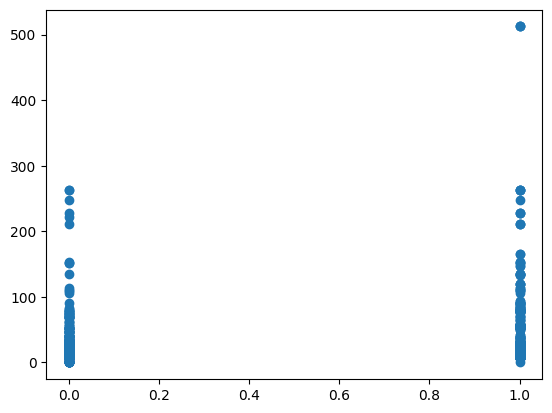

In [ ]:
x=titanic["Survived"] #not workable
y=titanic["Fare"]
plt.figure(100)
plt.scatter(x,y)

<Axes: xlabel='Fare'>

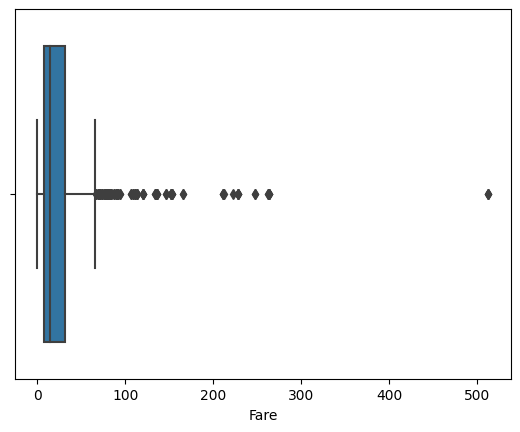

In [ ]:
plt.figure(dpi=100)
sns.boxplot(x="Fare",data=titanic)

#survived vs Age

<Axes: xlabel='Age'>

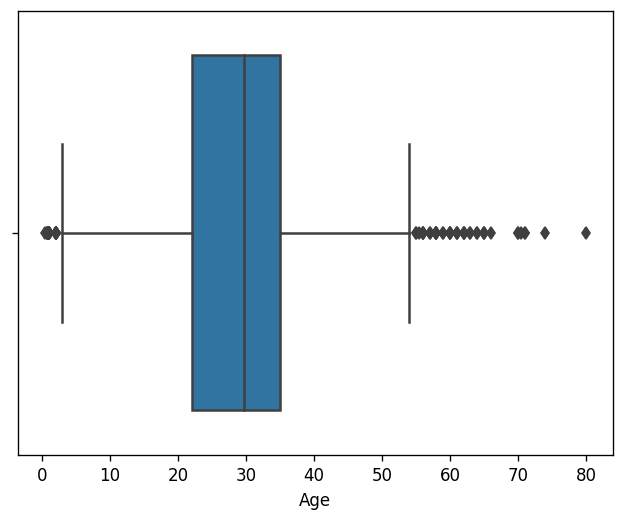

In [ ]:
plt.figure(dpi=120)
sns.boxplot(x="Age",data=titanic)

<Axes: xlabel='Age'>

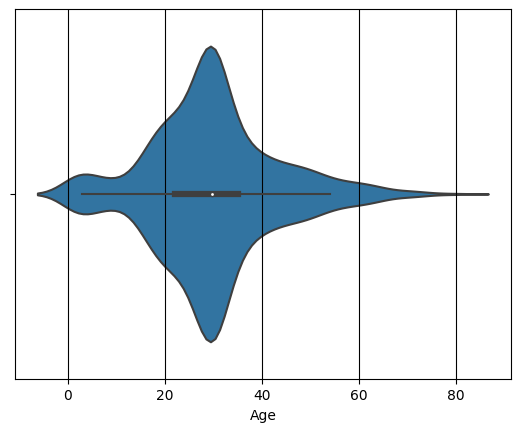

In [ ]:
plt.figure(dpi=100)
plt.grid(color="Black")
sns.violinplot(x="Age",data=titanic)

In [ ]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
titanic.Age.quantile(0.25)

22.0

In [ ]:
titanic.Age.quantile(0.50)

29.69911764705882

In [ ]:
titanic.Age.quantile(0.75)

35.0

In [ ]:
titanic.groupby(["Sex","Survived"])["Age"].mean()

Sex     Survived
female  0           26.023272
        1           28.979263
male    0           31.175224
        1           27.631705
Name: Age, dtype: float64

In [ ]:
titanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [ ]:
titanic["Survived"].value_counts(), #342 survived 549 not able to survived, 0 for non survived and 1 for survived

(0    549
 1    342
 Name: Survived, dtype: int64,)

In [ ]:
titanic["Survived"].value_counts().keys() #got to know about all survived and non survived passangers

Int64Index([0, 1], dtype='int64')

In [ ]:
titanic["Pclass"].value_counts() #got to know about passanger class, most people were in 3rd class and lowest were in 2nd class.

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [ ]:
titanic["Sex"].value_counts() #got to know how many male and female were their in the dataset.

male      577
female    314
Name: Sex, dtype: int64

In [ ]:
(titanic["Survived"].isnull()) #got to know if we have null value or not

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Survived, Length: 891, dtype: bool

In [ ]:
sum(titanic["Survived"].isnull()) #no null value are in the Survived

0

In [ ]:
titanic["Age"].isnull() #got to know if we have null value or not

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Age, Length: 891, dtype: bool

In [ ]:
sum(titanic["Age"].isnull()) #got to know if we have null value or not, here we have total 177 null values.

0

In [ ]:
titanic.dropna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C
